In [2]:
import pandas as pd
import numpy as np

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
taste = pd.read_csv('./data/train_triplets.txt', sep='\t', header=None, names=['user_id','song_id','play_count'])

In [4]:
taste.shape

(48373586, 3)

In [5]:
taste.head()

,user_id,song_id,play_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1


In [9]:
print "Number of unique users in the dataset is " + str(len(taste.user_id.unique()))
print "Number of unique songs in the dataset is " + str(len(taste.song_id.unique()))

Number of unique users in the dataset is 1019318
Number of unique songs in the dataset is 384546


#### Average Play counts by song and by user

In [6]:
average_play_by_song = taste.groupby('song_id')['play_count'].mean()

In [8]:
average_play_by_song.head()

song_id
SOAAADD12AB018A9DD    1.714286
SOAAADE12A6D4F80CC    1.333333
SOAAADF12A8C13DF62    1.500000
SOAAADZ12A8C1334FB    1.500000
SOAAAFI12A6D4F9C66    3.298246
Name: play_count, dtype: float64

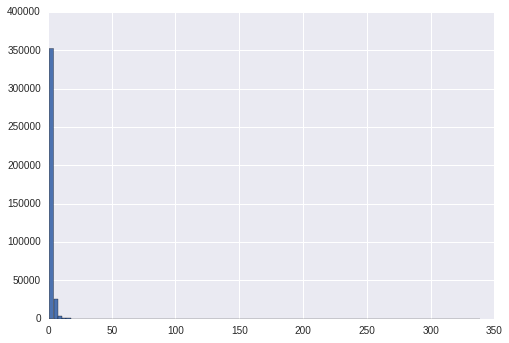

In [18]:
average_play_by_song.hist(bins=100)

In [10]:
total_play_by_song = taste.groupby('song_id')['play_count'].sum()

In [11]:
total_play_by_song.head()

song_id
SOAAADD12AB018A9DD     24
SOAAADE12A6D4F80CC     12
SOAAADF12A8C13DF62      9
SOAAADZ12A8C1334FB     12
SOAAAFI12A6D4F9C66    188
Name: play_count, dtype: int64

In [21]:
total_play_by_song.describe()

count    384546.000000
mean        360.633690
std        3256.809395
min           1.000000
25%           8.000000
50%          32.000000
75%         133.000000
max      726885.000000
Name: play_count, dtype: float64

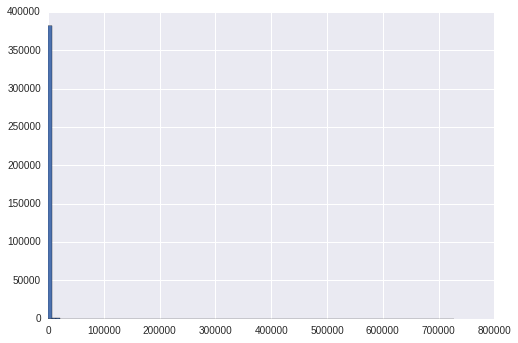

In [19]:
total_play_by_song.hist(bins=100)

In [12]:
count_play_by_song = taste.groupby('song_id')['play_count'].count()

In [13]:
count_play_by_song.head()

song_id
SOAAADD12AB018A9DD    14
SOAAADE12A6D4F80CC     9
SOAAADF12A8C13DF62     6
SOAAADZ12A8C1334FB     8
SOAAAFI12A6D4F9C66    57
Name: play_count, dtype: int64

In [22]:
count_play_by_song.describe()

count    384546.000000
mean        125.794017
std         799.025834
min           1.000000
25%           4.000000
50%          13.000000
75%          52.000000
max      110479.000000
Name: play_count, dtype: float64

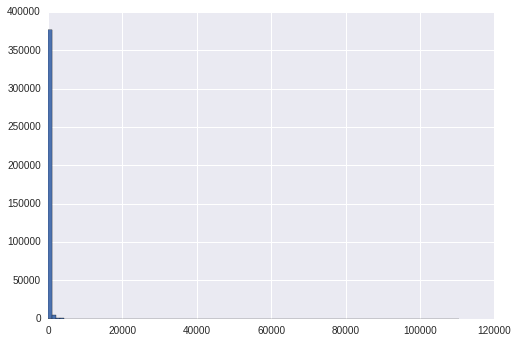

In [20]:
count_play_by_song.hist(bins=100)

In [23]:
average_play_by_user = taste.groupby('user_id')['play_count'].mean()
total_play_by_user = taste.groupby('user_id')['play_count'].sum()
count_play_by_user = taste.groupby('user_id')['play_count'].count()

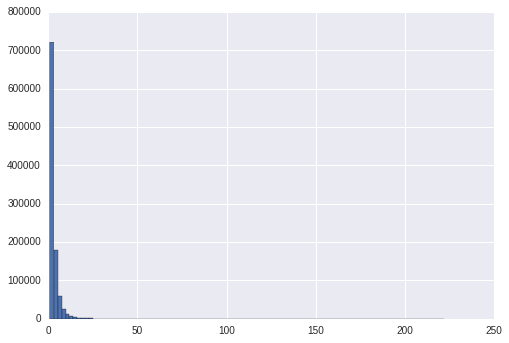

In [24]:
average_play_by_user.hist(bins=100)

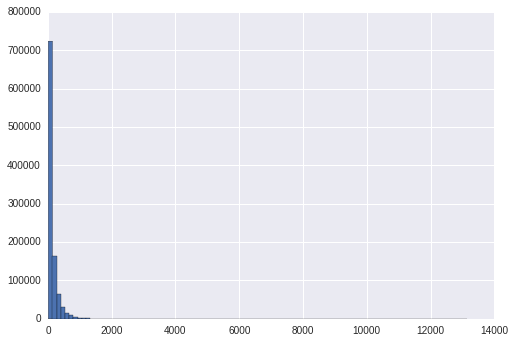

In [25]:
total_play_by_user.hist(bins=100)

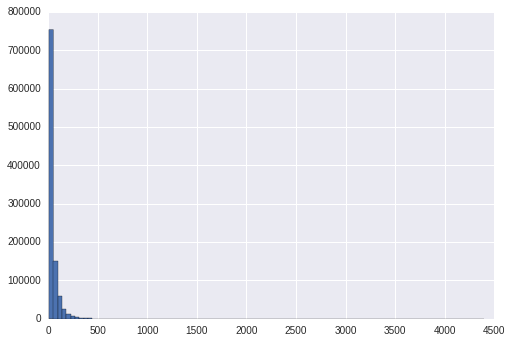

In [26]:
count_play_by_user.hist(bins=100)

In [49]:
# About 10% of user listen to more than 100 unique songs
# All users in the dataset listened to at least 10 unique songs
print len(count_play_by_user[count_play_by_user < 10]), len(count_play_by_user)
print len(count_play_by_user[count_play_by_user < 11]), len(count_play_by_user)
print len(count_play_by_user[count_play_by_user > 100]), len(count_play_by_user)
print len(count_play_by_user[count_play_by_user > 200]), len(count_play_by_user)

0 1019318
50608 1019318
110119 1019318
26062 1019318


In [ ]:
#ten_k_songs = pd.read_csv('./MillionSongSubset/AdditionalFiles/subset_unique_tracks.txt',sep='<SEP>',header=None,names=)

### Load metadata

In [28]:
import sqlite3
import os

In [29]:
# path to the Million Song Dataset track meta data
track_meta_path='./data/track_metadata.db'

In [30]:
conn = sqlite3.connect(track_meta_path)

In [31]:
q = "SELECT * FROM songs limit 1"
res = conn.execute(q)

In [33]:
res.fetchall()

[(u'TRMMMYQ128F932D901',
  u'Silent Night',
  u'SOQMMHC12AB0180CB8',
  u'Monster Ballads X-Mas',
  u'ARYZTJS1187B98C555',
  u'357ff05d-848a-44cf-b608-cb34b5701ae5',
  u'Faster Pussy cat',
  252.05506,
  0.649822100201,
  0.394031892714,
  2003,
  7032331,
  -1,
  0)]

In [34]:
q = "SELECT count(*) FROM songs"
res = conn.execute(q)
res.fetchall()

[(1000000,)]

In [35]:
count_play_by_song.head()

song_id
SOAAADD12AB018A9DD    14
SOAAADE12A6D4F80CC     9
SOAAADF12A8C13DF62     6
SOAAADZ12A8C1334FB     8
SOAAAFI12A6D4F9C66    57
Name: play_count, dtype: int64

In [36]:
q = "SELECT * FROM songs where song_id = 'SOAAAFI12A6D4F9C66'"
res = conn.execute(q)
res.fetchall()

[(u'TRZEXLQ128F1491D17',
  u'The Less You See',
  u'SOAAAFI12A6D4F9C66',
  u"I Love You But I've Chosen Darkness",
  u'ARWG6FM1187B9892B8',
  u'a9055d04-92ee-4c6c-80ac-e2ea7be06bf1',
  u"I Love You But I've Chosen Darkness",
  243.53914,
  0.634718788869,
  0.434736895201,
  2003,
  536778,
  -1,
  0)]